!pip install -q keras
!pip install -q tensorflow

!pip install keras.utils 

In [1]:
from __future__ import print_function
import keras
import tensorflow
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras import backend as K

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data('../mnist.npz')

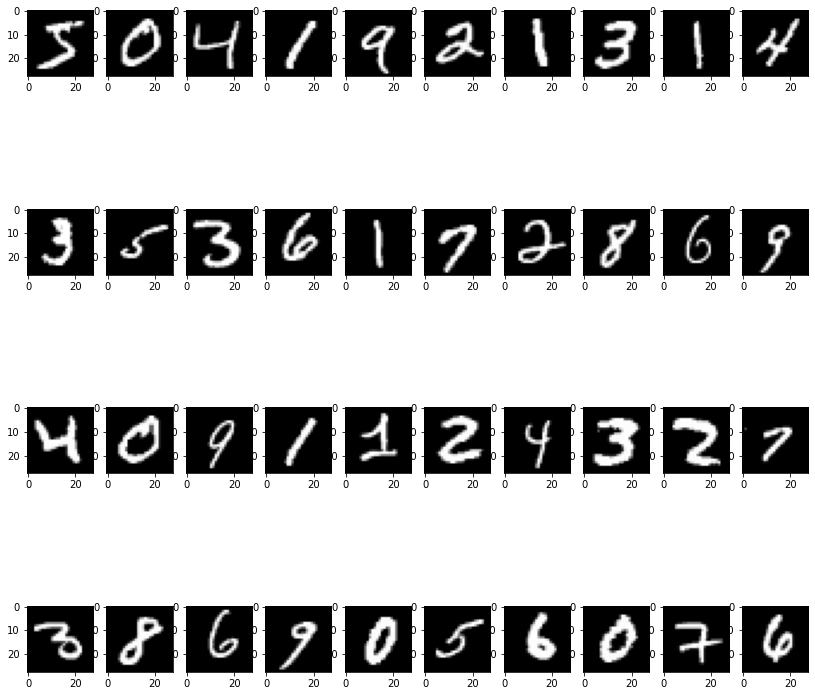

In [23]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [4]:
batch_size = 128 
num_classes = 10 
epochs = 6 # 12 epoch önerilir

img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [6]:
model = Sequential() 

In [7]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

 
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [9]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = tensorflow.keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

In [10]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/6
469/469 [==============================] - 90s 191ms/step - loss: 22.8397 - accuracy: 0.1575 - val_loss: 3.7458 - val_accuracy: 0.4274
Epoch 2/6
469/469 [==============================] - 89s 189ms/step - loss: 10.3405 - accuracy: 0.2641 - val_loss: 1.7434 - val_accuracy: 0.5709
Epoch 3/6
469/469 [==============================] - 113s 241ms/step - loss: 5.4451 - accuracy: 0.3311 - val_loss: 1.2019 - val_accuracy: 0.6105
Epoch 4/6
469/469 [==============================] - 105s 223ms/step - loss: 3.3677 - accuracy: 0.3516 - val_loss: 1.2867 - val_accuracy: 0.5988
Epoch 5/6
469/469 [==============================] - 109s 232ms/step - loss: 2.5092 - accuracy: 0.3590 - val_loss: 1.4092 - val_accuracy: 0.5757
Epoch 6/6
469/469 [==============================] - 91s 195ms/step - loss: 2.1572 - accuracy: 0.3654 - val_loss: 1.4308 - val_accuracy: 0.5778


model.save('./mnist_model.h5')

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.4308414459228516
Test Accuracy: 0.5777999758720398


model_test = load_model('./mnist_model.h5')

Predicted number 4


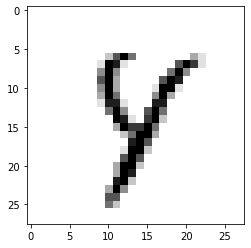

In [43]:
import random
i = random.randint(1,5000)

pred= model.predict(x_test[i].reshape(1,28,28,1))
print("Predicted number",pred.argmax())

plt.imshow(x_test[i].reshape(28,28), cmap="gray_r")
plt.show()